<h1>ML TASK1 CA2</h1> 
<h4>Name: RISHIKESH WAGHELA</h4>
<h4>student_no : 10628916</h4>
<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 50px">
    <ul>
        <li>
            <a href="#USINGLOGIC">USING LOGIC</a>
        </li>
        <li>
            <a href="#BAYETHEROEM">MATHEMATICALLY BAYE'S THEOREM</a>
        </li>
        <li>
            <a href="#question3">NAIVE BAYE CLASSIFIER</a>
        </li>
    </ul>
</div>
<hr>


In [43]:
# library
import pandas as pd


<h1 id ="USINGLOGIC">USING LOGIC</h1>

In [44]:
# creating a dataframe
covid_df = pd.DataFrame({"Fever":["Y", "N","Y","Y","N","Y","N","N","N","Y","N","Y","Y","Y"],
                    "Sore_Throat":["N","N","N","N","N","N","Y","Y","Y","Y","Y","Y","Y","Y"],
                    "Lost_Sense_Smell": ["Y","N","N","Y","N","N","Y","N","Y","N","N","Y","Y","N"],
                    "Headache": ["Y","Y","N","Y","Y","Y","N","N","Y","Y","N","Y","Y","Y"],
                    "Bodyache": ["Y","N","Y","Y","N","Y","N","Y","Y","N","N","Y","Y","N"],
                    "Covid_19" : ["Y","N","N","Y","N","N","N","N","N","Y","N","Y","Y","Y"]
                    
                    
                    
         })

In [45]:
covid_df

,Fever,Sore_Throat,Lost_Sense_Smell,Headache,Bodyache,Covid_19
0,Y,N,Y,Y,Y,Y
1,N,N,N,Y,N,N
2,Y,N,N,N,Y,N
3,Y,N,Y,Y,Y,Y
4,N,N,N,Y,N,N
5,Y,N,N,Y,Y,N
6,N,Y,Y,N,N,N
7,N,Y,N,N,Y,N
8,N,Y,Y,Y,Y,N
9,Y,Y,N,Y,N,Y


## THE FUNCTION TO CHECK YOU HAVE COVID-19 OR NOT USING OUR GIVEN DATA

In [46]:
##### single Function to check the output of the table

def covid_checker():
    print("WELCOME TO COVID TEST")
    
    print("PLEASE ENTER Y/N") # PLEASE ENTER Y OR N
    Fever = str(input("Do you have Fever"))
    Sore_throat = str(input("Do you feel Sore throat"))
    Lost_Sense_smell = str(input("Do you have lost sense"))
    Headache = str(input("Do you have Headache"))
    Bodyache = str(input("do You have Body pain"))
    
    if (Fever == 'Y') and (Headache == 'Y') and (Lost_Sense_smell == 'Y'):
        print("You have covid")
        
    elif (Fever == 'Y') and (Headache == 'Y') and (Sore_throat == 'Y'):
        print("YOU HAVE COVID")
    
    else:
        print("YOU DON'T HAVE COVID")

In [47]:
# SAME FUNCTION TO VERIFY THE PREDICTION
def covid_checker_model():
    covid_df['PREDICTION'] = 'N'  # Add a new column to the DataFrame to store the predictions
    for i in range(len(covid_df)):
        if (covid_df.loc[i, "Fever"] == "Y") and (covid_df.loc[i, "Headache"] == "Y") and (covid_df.loc[i, "Sore_Throat"] == "Y"):
            covid_df.loc[i, 'PREDICTION'] = "Y"
        elif (covid_df.loc[i, "Fever"] == "Y") and (covid_df.loc[i, "Headache"] == "Y") and (covid_df.loc[i, "Lost_Sense_Smell"] == "Y"):
            covid_df.loc[i, 'PREDICTION'] = "Y"
    return covid_df["PREDICTION"]

In [48]:
covid_df['PREDICTION'] = covid_checker_model()
covid_df

,Fever,Sore_Throat,Lost_Sense_Smell,Headache,Bodyache,Covid_19,PREDICTION
0,Y,N,Y,Y,Y,Y,Y
1,N,N,N,Y,N,N,N
2,Y,N,N,N,Y,N,N
3,Y,N,Y,Y,Y,Y,Y
4,N,N,N,Y,N,N,N
5,Y,N,N,Y,Y,N,N
6,N,Y,Y,N,N,N,N
7,N,Y,N,N,Y,N,N
8,N,Y,Y,Y,Y,N,N
9,Y,Y,N,Y,N,Y,Y


<h1 id ="BAYETHEROEM">MATHEMATICALLY BAYE'S THEOREM</h1>


BAYE'S THEOREM
 
                            P(A|B) = P(B|A)*P(A)/P(B)

                            P(Y|x1,x2,x3..xn) = P(x1|Y) * P(x2|Y)......P(xn|Y) * P(Y)/P(x1,x2,x3....xn)

                            Where Y is the target variable and x are features 



in our case we can do it 
                            
                            
                            
                            To calculate the probability of having COVID-19 given the symptoms of headache, body ache, and sore throat
                    
                    
                    P(Symptoms|Covid_19): the probability of having symptoms given that you have COVID-19.
                    P(Covid_19|Symptoms): the probability of having COVID-19 given that you have symptoms.
                    P(Covid_19) = 6/14 = 0.4286
                    P(Symptoms|Covid_19) = 1 (everyone with COVID-19 in the dataset has these symptoms)
                    P(Symptoms|Not Covid_19) = 4/8 = 0.5 (number of people without COVID-19 who have these symptoms divided by the total number of people without COVID-19)
                    P(Symptoms) = 14/14 = 1 (everyone in the dataset has symptoms)

                P(Covid_19|Headache, Bodyache, Sore_Throat) = (P(Headache, Bodyache, Sore_Throat|Covid_19) * P(Covid_19)) / P(Headache, Bodyache, Sore_Throat)
                
                P(Covid_19|Headache, Bodyache, Sore_Throat) = (1 * 0.4286) / P(Headache, Bodyache, Sore_Throat)
                
                P(Headache, Bodyache, Sore_Throat) = 1 * 0.4286 + (2/8) * (3/8) * (5/8) * (8/14) = 0.5357
                
                P(Covid_19|Headache, Bodyache, Sore_Throat) = (1 * 0.4286) / 0.5357 = 0.8

                    So, given the signs of a headache, body ache, and sore throat, the likelihood of having COVID-19 is 0.8, or 80%.

                


<h1 id ="question3">NAIVE BAYE CLASSIFIER</h1>

In [49]:
### library ####


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



In [50]:
# DEFINING X AND Y

X = covid_df.drop(columns = ["Covid_19", "PREDICTION"])
y = covid_df['Covid_19']


In [51]:
ohe = OneHotEncoder(sparse = False)
X = ohe.fit_transform(X)

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [53]:
nb = GaussianNB()
nb.fit(X_train, y_train)



GaussianNB()

In [54]:
# Step 4: Predict COVID-19
y_pred = nb.predict(X_test)


In [55]:
#Accuracy
nb.score(X_test, y_test) * 100

100.0

In [56]:
#Comparing the score of the trained data with test data
nb.score(X_train,y_train)*100

88.88888888888889

In [57]:
accuracy_score(y_test, y_pred)

1.0

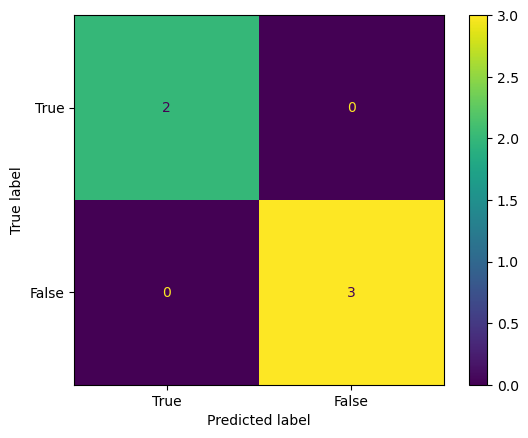

In [58]:

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

In [59]:
print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           N       1.00      1.00      1.00         2
           Y       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## According to the classification report that was given, the model appears to have done exceptionally well, with an overall accuracy of 1.0 (or 100%). The model did not make any false positive or false negative forecasts, as shown by precision and recall scores for both classes (N and Y) being 1.0. The F1-score, which represents the harmonic mean of precision and memory, is also 1.0 for both classes, demonstrating that the model has attained ideal precision and recall. So, based on this report, it seems like the model is doing very well and has accurately classified every instance in the dataset.